## Kehua Chu (uid: 806153163)

### Problem 1

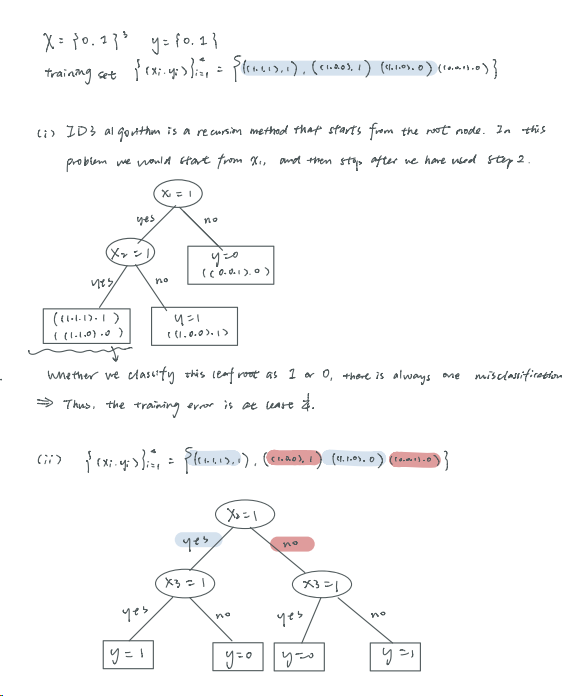

### Import Module

In [1]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import io
import matplotlib.lines as mlines
from fredapi import Fred
import statsmodels.formula.api as smf
import datetime
import statsmodels.api as sm
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from simple_colors import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Problem 2 (survival on the Titanic)
### The titanic.xls dataset contains information on each of the 1309 passengers of RMS Titanic. The goal is to predict passenger survival. Use the first 1100 rows as the training sample and the remaining rows as the test sample.

In [5]:
data = pd.read_csv('titanic.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
data_copy = data.copy()
data_copy.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### (i) Fit a decision tree of maximal depth 𝑑 ∈ {1, 2, 3, 4, 5, 6, 7, 8} with the information gain as the splitting criterion.

In [7]:
drop = ['boat', 'body', 'cabin', 'home.dest']

data = data.drop(drop, axis = 1)

In [8]:
data['age'].fillna(data['age'].median(), inplace=True)
data['fare'].fillna(data['fare'].median(), inplace=True)

In [10]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [12]:
data_cleaned = data.dropna(subset=['survived'])

# Choose variables for decision tree
X = data_cleaned.drop(columns=['survived'])
y = data_cleaned['survived']

label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Split the data into train and test sets
X_train = X_encoded[:1100]
y_train = y[:1100]
X_test = X_encoded[1100:]
y_test = y[1100:]


In [13]:
trees = []
max_depths = [1, 2, 3, 4, 5, 6, 7, 8]

# Deision tree 
for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, criterion='entropy')  # Information gain as the splitting criterion
    tree.fit(X_train, y_train)
    trees.append(tree)


### (ii) Plot the decision trees corresponding to 𝑑 = 1 and 𝑑 = 2 (in Python, use sklearn.tree.plot_tree). Interpret the results

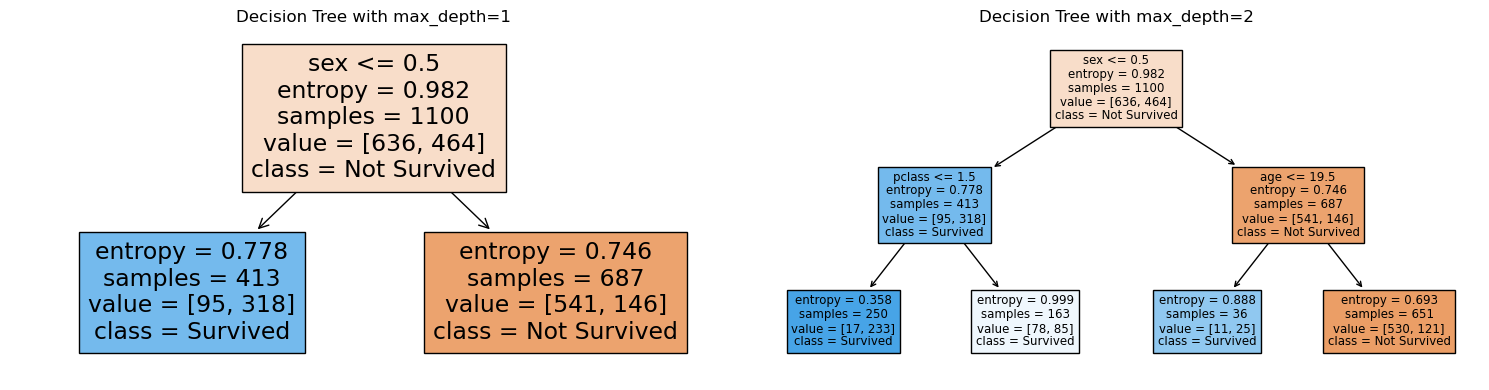

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

for i, (depth, tree) in enumerate(zip(max_depths[:2], trees[:2])):
    plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], ax=axes[i])
    axes[i].set_title(f'Decision Tree with max_depth={depth}')

plt.tight_layout()
plt.show()


### (iii_1) Calculate the test error (misclassification rate) on the test sample and plot it as a function of depth 𝑑. 

In [16]:
test_errors = []
count = 1

for tree in trees:
    y_pred = tree.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    test_errors.append(error_rate)

for i in test_errors:
    print('For the depth',count,', the test error is:', i)
    count+=1

For the depth 1 , the test error is: 0.22488038277511957
For the depth 2 , the test error is: 0.2727272727272727
For the depth 3 , the test error is: 0.1722488038277512
For the depth 4 , the test error is: 0.18181818181818177
For the depth 5 , the test error is: 0.2009569377990431
For the depth 6 , the test error is: 0.2009569377990431
For the depth 7 , the test error is: 0.21052631578947367
For the depth 8 , the test error is: 0.22009569377990434


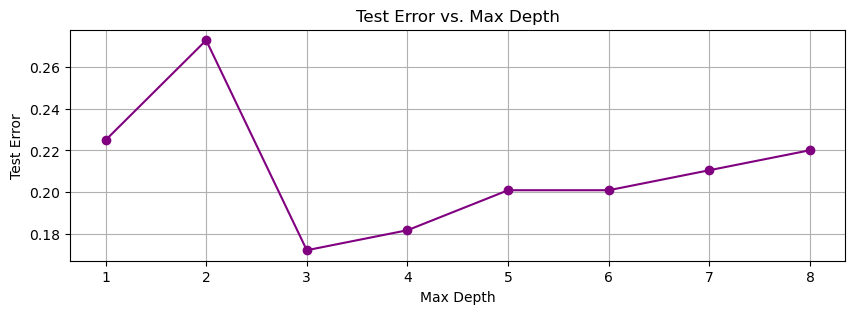

In [17]:
plt.figure(figsize = (10,3))
plt.plot(max_depths, test_errors, marker='o',color = 'purple')
plt.xlabel('Max Depth')
plt.ylabel('Test Error')
plt.title('Test Error vs. Max Depth')
plt.xticks(max_depths)
plt.grid()
plt.show()

### (iii_2) Does the test error change much? Which value of 𝑑 would you choose?

Yes, the test error does change.

From the graph we could see that when depth is 3, the Test error performs best at around 0.172. And as for depth equals 3, there would be not much misspecification or overfitting problem. Thus I'd like to choose depth = 3 as my decision tree depth.